In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-genetic-data/genetic_data_train.csv
/kaggle/input/human-genetic-data/genetic_data_test.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [102]:
df = pd.read_csv("/kaggle/input/human-genetic-data/genetic_data_train.csv")

In [3]:
df.shape

(183, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       183 non-null    float64
 1   PC2       183 non-null    float64
 2   PC3       183 non-null    float64
 3   PC4       183 non-null    float64
 4   PC5       183 non-null    float64
 5   PC6       183 non-null    float64
 6   PC7       183 non-null    float64
 7   PC8       183 non-null    float64
 8   PC9       183 non-null    float64
 9   PC10      183 non-null    float64
 10  Ancestry  183 non-null    object 
dtypes: float64(10), object(1)
memory usage: 15.9+ KB


In [7]:
df.isnull().sum()

PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
PC7         0
PC8         0
PC9         0
PC10        0
Ancestry    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [5]:
df['Ancestry'].unique()

array(['African', 'European', 'EastAsian', 'Oceanian', 'NativeAmerican'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [108]:
df['Ancestry'] =  le.fit_transform(y)

In [109]:
df['Ancestry'].unique()

array([0, 2, 1, 4, 3])

In [111]:
#X = df.drop(columns=['Ancestry'])  
y = df['Ancestry']
y

0      0
1      0
2      0
3      0
4      0
      ..
178    3
179    3
180    3
181    3
182    3
Name: Ancestry, Length: 183, dtype: int64

In [106]:
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274
...,...,...,...,...,...,...,...,...,...,...
178,4.562678,1.595991,-6.255160,-3.083079,0.155693,-2.509439,-1.186470,0.641546,2.893239,0.885596
179,4.559052,1.581629,-5.121037,-4.312312,0.021703,-0.787173,-1.838054,-0.118590,1.200644,0.885596
180,3.101335,1.477101,-5.759153,-2.083745,-0.750615,1.061579,-1.341655,-0.215556,-0.133415,0.885596
181,3.235086,-0.974829,-4.049595,0.020907,-0.489322,0.627622,0.087942,0.737715,3.262126,0.885596


In [10]:
X.shape , y.shape

((183, 10), (183,))

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'ovr')

In [16]:
lr.fit(X,y)

LogisticRegression(multi_class='ovr')

In [87]:
test = pd.read_csv('/kaggle/input/human-genetic-data/genetic_data_test.csv')

In [88]:
test.shape

(111, 11)

In [19]:
test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274,Unknown
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467,Unknown
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274,Unknown
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274,Unknown
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
106,-11.030349,1.712786,-1.392893,-0.163989,3.623641,-0.263645,-3.337796,2.279226,-2.632659,-0.671274,AfricanAmerican
107,-7.994173,0.045333,-0.738547,0.189793,-2.545140,-0.332066,0.026289,-1.840944,-0.456438,-0.671274,AfricanAmerican
108,-8.874531,2.074620,-2.060999,-0.898143,-1.372896,-3.175091,2.325163,-1.256258,-0.133253,-0.671274,AfricanAmerican
109,-7.017063,-0.199721,-1.469538,-1.997714,1.892038,-1.880466,-3.278863,-0.336890,0.042410,-0.671274,AfricanAmerican


In [89]:
X_test = test.drop(columns=['Ancestry'])
y_test = test['Ancestry']

In [90]:
X_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274
...,...,...,...,...,...,...,...,...,...,...
106,-11.030349,1.712786,-1.392893,-0.163989,3.623641,-0.263645,-3.337796,2.279226,-2.632659,-0.671274
107,-7.994173,0.045333,-0.738547,0.189793,-2.545140,-0.332066,0.026289,-1.840944,-0.456438,-0.671274
108,-8.874531,2.074620,-2.060999,-0.898143,-1.372896,-3.175091,2.325163,-1.256258,-0.133253,-0.671274
109,-7.017063,-0.199721,-1.469538,-1.997714,1.892038,-1.880466,-3.278863,-0.336890,0.042410,-0.671274


In [93]:
y_test.isnull().sum()

0

In [94]:
y_test= le.fit_transform(y_test)

In [95]:
y_test

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [24]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score


In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4774774774774775
Precision: 0.20363382250174702
Recall: 0.24
F1 Score: 0.2105952380952381


In [26]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_pred, y_test)
print(confusion_matrix(y_pred,y_test))

print(report)

[[52  0  1  0  0]
 [ 0  0  1  0  0]
 [ 0 26  1  0  0]
 [ 0 28  1  0  0]
 [ 0  0  1  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.00      0.00      0.00         1
           2       0.20      0.04      0.06        27
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00         1

    accuracy                           0.48       111
   macro avg       0.24      0.20      0.21       111
weighted avg       0.53      0.48      0.49       111



## Hyperparameter tunning using gridsearch CV

In [27]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [28]:
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'class_weight': [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(multi_class='multinomial', max_iter=1000),
                           param_grid=param_grid ,cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X, y)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'solver': 'newton-cg'}


In [30]:
y_pred  = grid_search.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.46846846846846846


In [32]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_pred, y_test)
print(confusion_matrix(y_pred,y_test))

print(report)

[[51  0  1  0  0]
 [ 0  0  1  0  0]
 [ 1 27  1  0  0]
 [ 0 27  1  0  0]
 [ 0  0  1  0  0]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.00      0.00      0.00         1
           2       0.20      0.03      0.06        29
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00         1

    accuracy                           0.47       111
   macro avg       0.24      0.20      0.21       111
weighted avg       0.51      0.47      0.47       111



# SVM

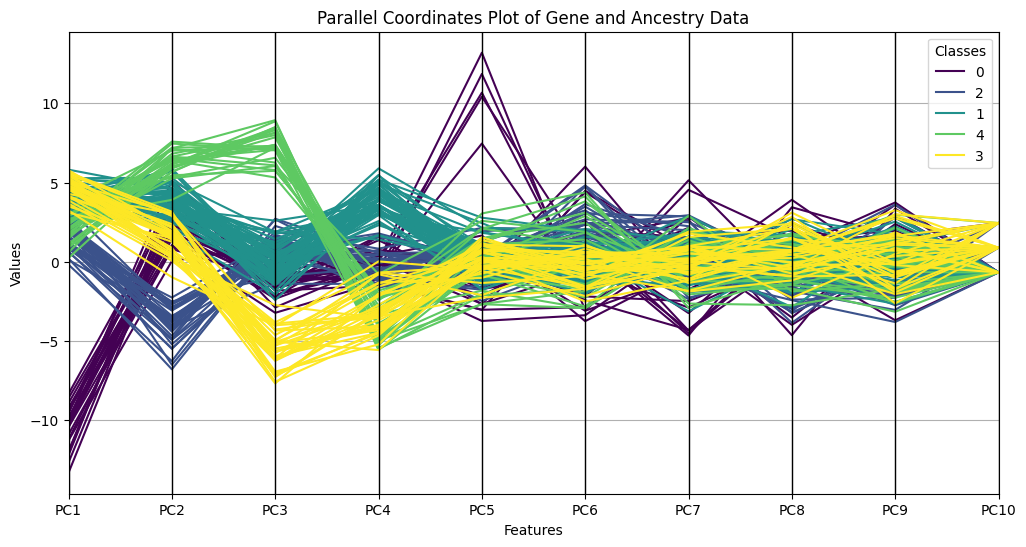

In [14]:
# Create Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(df, 'Ancestry', colormap='viridis')

# Customize the plot
plt.title('Parallel Coordinates Plot of Gene and Ancestry Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.legend(title='Classes')
plt.show()

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
kernels = ['linear', 'poly', 'rbf']

# Create a dictionary to store models and results
results = {}

# Train and evaluate SVM with different kernels using OvR
for kernel in kernels:
    model = SVC(kernel=kernel, decision_function_shape='ovr')  # Explicitly set OvR
    model.fit(X, y)
    
    y_pred = model.predict(X_test)
    results[kernel] = {
        'model': model,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Print classification report
    print(f"Kernel: {kernel}")
    print(results[kernel]['classification_report'])


Kernel: linear
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.50      0.02      0.04        54
           2       0.04      0.20      0.06         5
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.49       111
   macro avg       0.30      0.24      0.22       111
weighted avg       0.70      0.49      0.48       111

Kernel: poly
              precision    recall  f1-score   support

           0       0.97      0.58      0.72        52
           1       0.00      0.00      0.00        54
           2       0.01      0.20      0.03         5
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.28       111
   macro avg       0.20      0.16      0.15       111
weighted avg       0.45      0.28      0.34      

In [35]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  0],
       [ 0,  1, 26, 27,  0],
       [ 1,  1,  1,  1,  1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [38]:
model = SVC(kernel='rbf', decision_function_shape='ovr')  # Explicitly set OvR
model.fit(X, y)

SVC()

In [41]:
  y_pred = model.predict(X_test)


In [48]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.50      0.02      0.04        54
           2       0.04      0.20      0.06         5
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.49       111
   macro avg       0.30      0.24      0.22       111
weighted avg       0.70      0.49      0.48       111

[[52  0  0  0  0]
 [ 0  1 26 27  0]
 [ 1  1  1  1  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


- the data is not linear thus rbf is good

### HyperParameter CV using Gridsearch CV

In [54]:
# Define a parameter grid for the SVM
param_grid = {    
    'C': [0.01, 0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],  # Ensure this is a list
    'decision_function_shape': ['ovr']     # Specify OvR
}

# Set up the grid search
grid_search = GridSearchCV(SVC(), param_grid,refit=True ,cv=5, verbose=3)
grid_search.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.01, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=0.324 total time=   0.0s
[CV 2/5] END C=0.01, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=0.351 total time=   0.0s
[CV 3/5] END C=0.01, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=0.324 total time=   0.0s
[CV 4/5] END C=0.01, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 5/5] END C=0.01, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 1/5] END C=0.01, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=0.324 total time=   0.0s
[CV 2/5] END C=0.01, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=0.351 total time=   0.0s
[CV 3/5] END C=0.01, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=0.324 total time=   0.0s
[CV 4/5] END C=0.01, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=0.333 total time=   0.0s
[CV

In [55]:
best_model = grid_search.best_params_
best_model

{'C': 0.1, 'decision_function_shape': 'ovr', 'gamma': 0.01, 'kernel': 'rbf'}

In [57]:
y_pred = grid_search.predict(X_test)

In [58]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.00      0.00      0.00        54
           2       0.03      0.20      0.05         5
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.48       111
   macro avg       0.20      0.24      0.21       111
weighted avg       0.46      0.48      0.47       111

[[52  0  0  0  0]
 [ 0  0 31 23  0]
 [ 1  1  1  1  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


In [71]:
X.shape , y.shape , X_test.shape , y_test.shape , y_pred.shape

((183, 10), (183,), (111, 10), (111,), (111,))

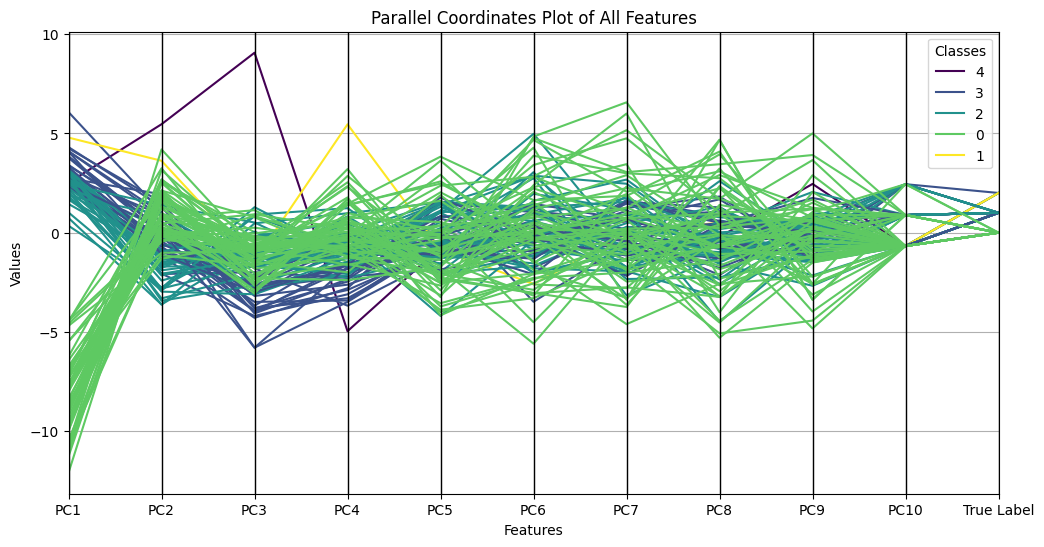

In [74]:
# Prepare results DataFrame for parallel coordinates
results_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

# Combine with test features
features_df = pd.DataFrame(X_test)
combined_df = pd.concat([features_df.reset_index(drop=True), results_df.reset_index(drop=True)], axis=1)

# Convert labels to categorical for better plotting
combined_df['Predicted Label'] = combined_df['Predicted Label'].astype(str)

# Create Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(combined_df, 'Predicted Label', colormap='viridis')

# Customize the plot
plt.title('Parallel Coordinates Plot of All Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.legend(title='Classes')
plt.show()